In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


In [4]:
dataset_link = "neurocipher/heartdisease" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\heartdisease' already exists with files. Skipping download (replace=False).


In [5]:
files

['Heart_Disease_Prediction.csv']

In [6]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(270, 14)

'Description'

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.43,9.11,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.17,0.95,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.34,17.86,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.66,51.69,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.02,1.00,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.68,23.17,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.05,1.15,0.0,0.0,0.8,1.6,6.2


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Age,int64,0,41,"[62, 44, 57]"
Sex,int64,0,2,"[1, 1, 1]"
Chest pain type,int64,0,4,"[4, 3, 3]"
BP,int64,0,47,"[125, 135, 126]"
Cholesterol,int64,0,144,"[226, 199, 250]"
FBS over 120,int64,0,2,"[0, 0, 0]"
EKG results,int64,0,3,"[2, 2, 0]"
Max HR,int64,0,90,"[171, 88, 95]"
Exercise angina,int64,0,2,"[0, 0, 0]"
ST depression,float64,0,39,"[1.2, 1.5, 0.1]"


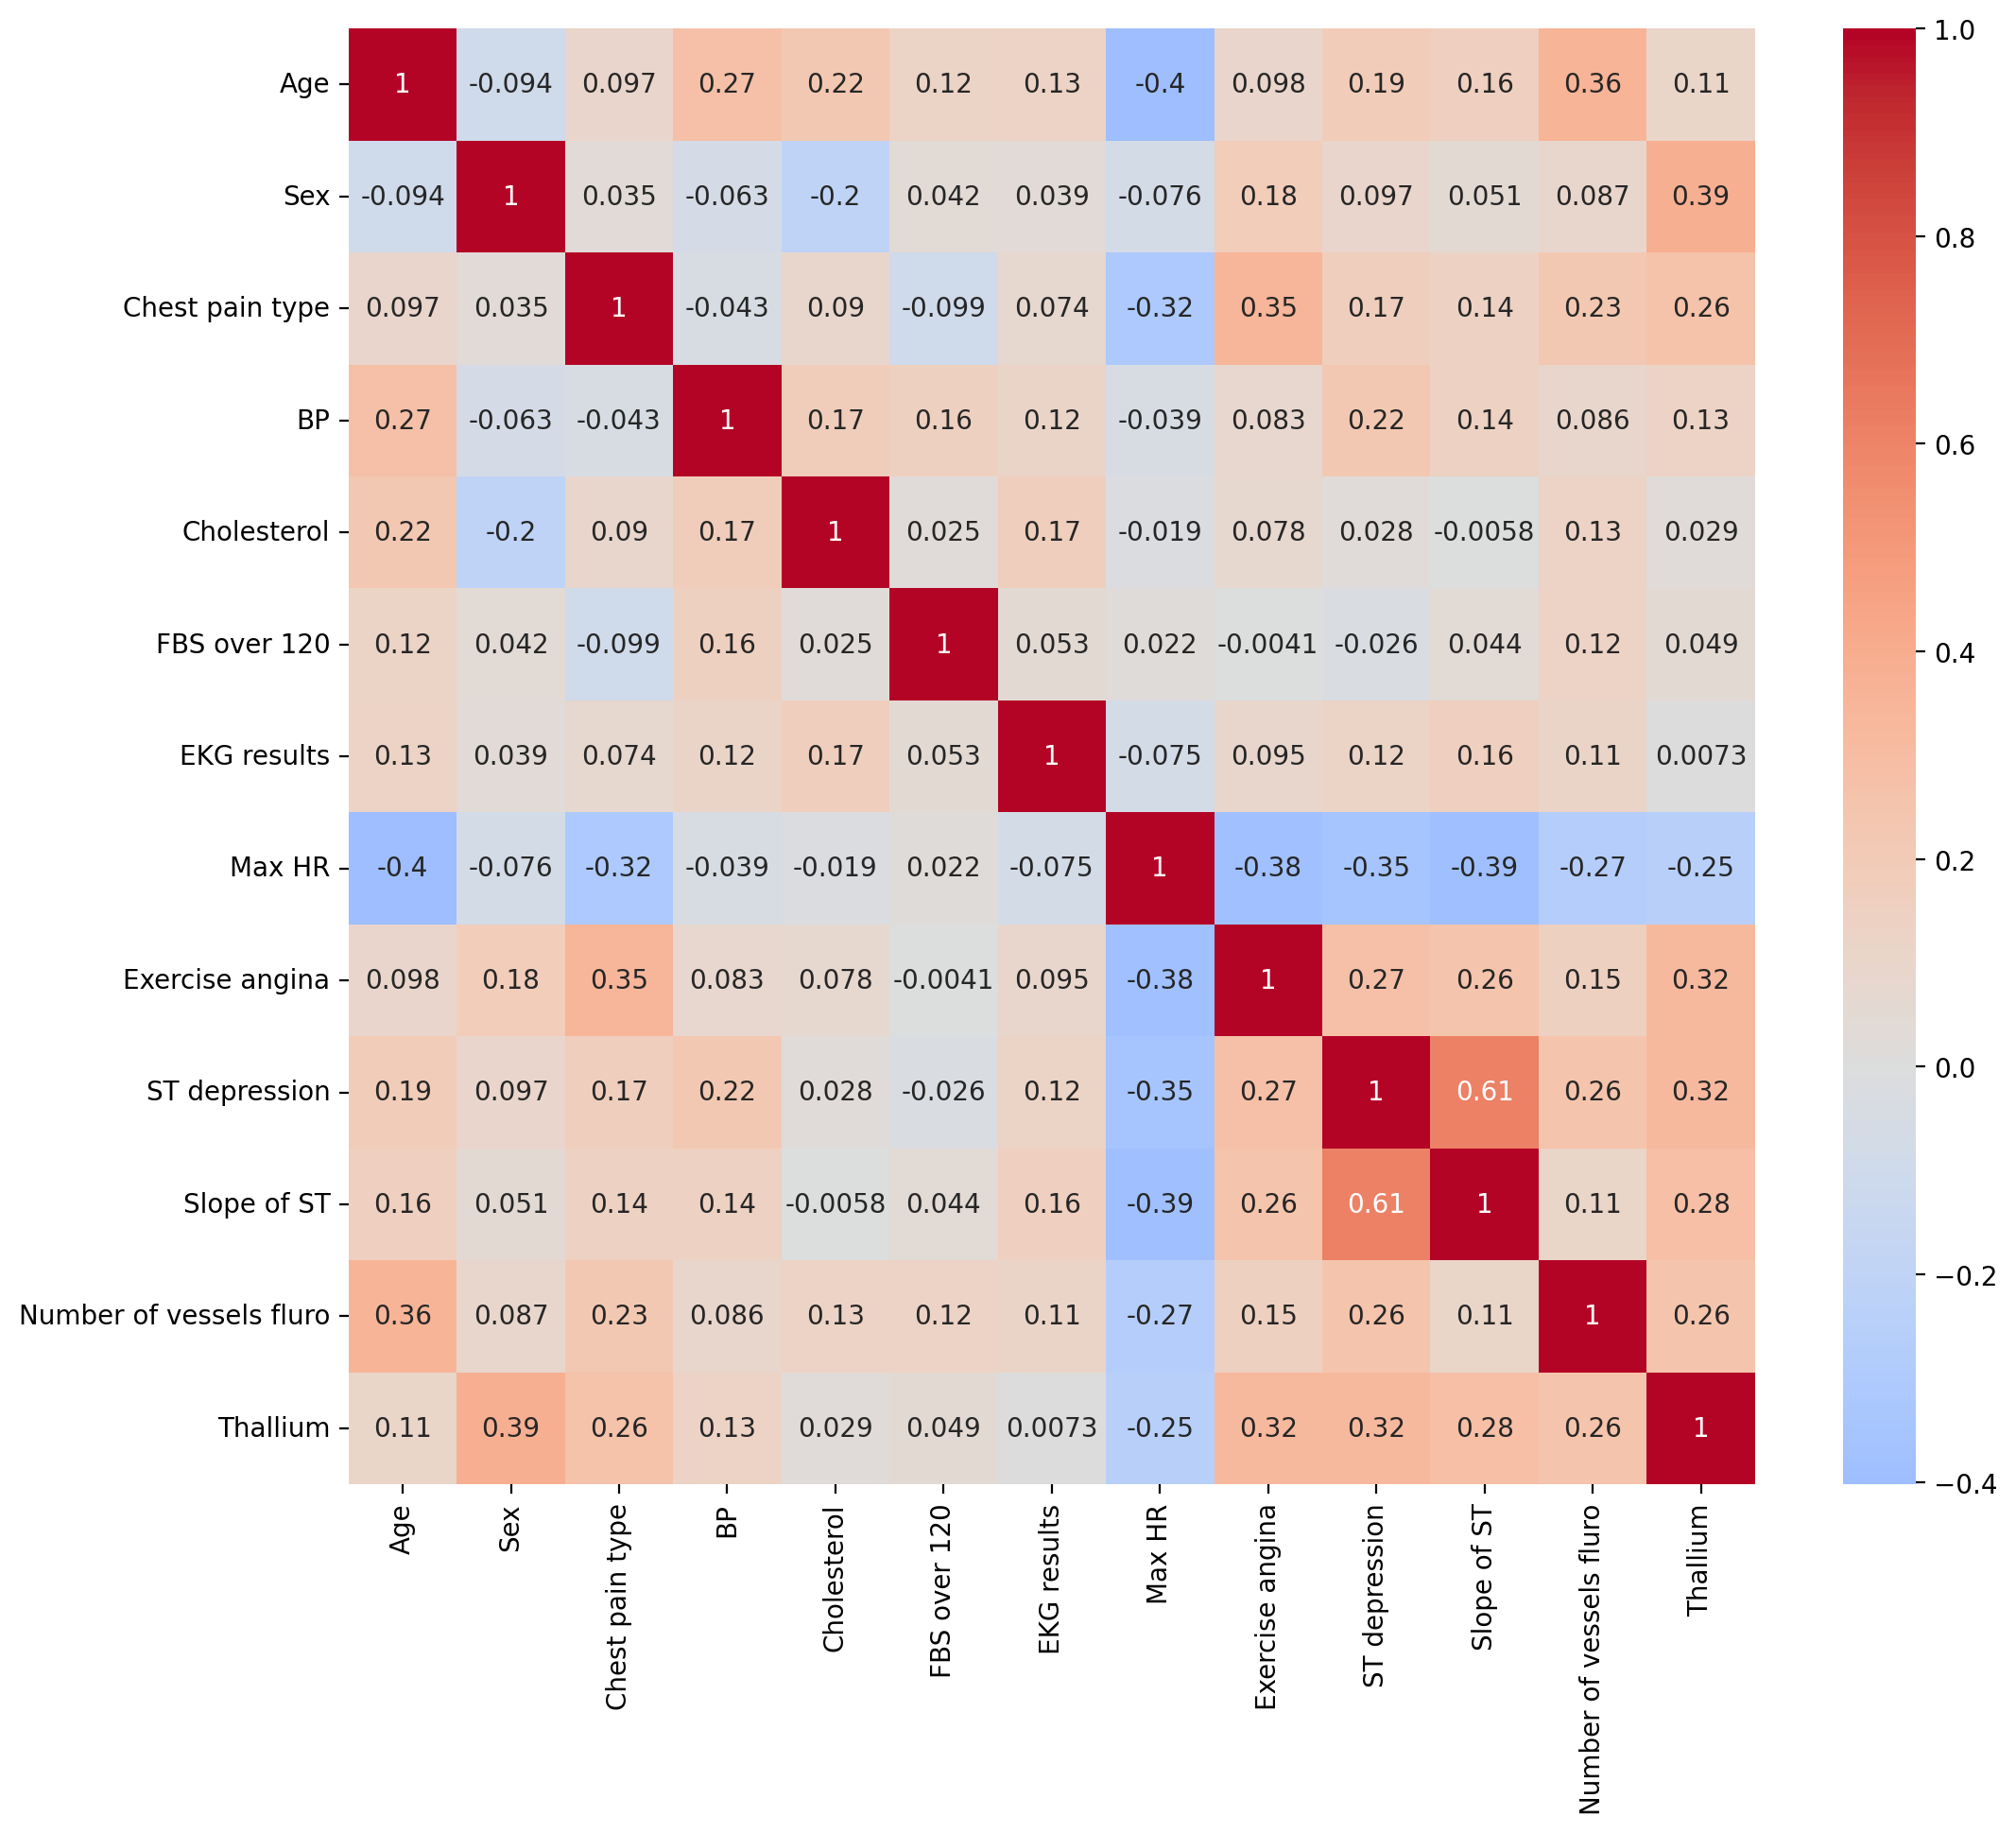

In [8]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);